In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('seaborn')

In [2]:
data = pd.read_csv("https://opendata.ecdc.europa.eu/covid19/casedistribution/csv").sort_values(by=['countriesAndTerritories','year', 'month', 'day'])
data

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018
88,31/12/2019,31,12,2019,0,0,Afghanistan,AF,AFG,37172386.0
87,01/01/2020,1,1,2020,0,0,Afghanistan,AF,AFG,37172386.0
86,02/01/2020,2,1,2020,0,0,Afghanistan,AF,AFG,37172386.0
85,03/01/2020,3,1,2020,0,0,Afghanistan,AF,AFG,37172386.0
84,04/01/2020,4,1,2020,0,0,Afghanistan,AF,AFG,37172386.0
...,...,...,...,...,...,...,...,...,...,...
9296,03/04/2020,3,4,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0
9295,04/04/2020,4,4,2020,1,0,Zimbabwe,ZW,ZWE,14439018.0
9294,05/04/2020,5,4,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0
9293,06/04/2020,6,4,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0


In [3]:
data['countriesAndTerritories'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua_and_Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia',
       'Bonaire, Saint Eustatius and Saba', 'Bosnia_and_Herzegovina',
       'Botswana', 'Brazil', 'British_Virgin_Islands',
       'Brunei_Darussalam', 'Bulgaria', 'Burkina_Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Canada', 'Cape_Verde',
       'Cases_on_an_international_conveyance_Japan', 'Cayman_Islands',
       'Central_African_Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Congo', 'Costa_Rica', 'Cote_dIvoire', 'Croatia', 'Cuba',
       'Curaçao', 'Cyprus', 'Czechia', 'Democratic_Republic_of_the_Congo',
       'Denmark', 'Djibouti', 'Dominica', 'Dominican_Republic', 'Ecuador',
       'Egypt', 'El_Salvador', 'Equatorial_Guinea', 'Eritrea', 'Estonia',


In [4]:
df = pd.DataFrame()
df['date'] = pd.to_datetime(data['dateRep'], format='%d/%m/%Y')
df['country'] = data['countriesAndTerritories']
df['code'] = data['countryterritoryCode']
df['cases'] = data['cases']
df['deaths'] = data['deaths']
df

,date,country,code,cases,deaths
88,2019-12-31,Afghanistan,AFG,0,0
87,2020-01-01,Afghanistan,AFG,0,0
86,2020-01-02,Afghanistan,AFG,0,0
85,2020-01-03,Afghanistan,AFG,0,0
84,2020-01-04,Afghanistan,AFG,0,0
...,...,...,...,...,...
9296,2020-04-03,Zimbabwe,ZWE,0,0
9295,2020-04-04,Zimbabwe,ZWE,1,0
9294,2020-04-05,Zimbabwe,ZWE,0,0
9293,2020-04-06,Zimbabwe,ZWE,0,0


In [5]:
df.groupby('country')['deaths'].apply(lambda x: x.cumsum())


88      0
87      0
86      0
85      0
84      0
       ..
9296    1
9295    1
9294    1
9293    1
9292    1
Name: deaths, Length: 9310, dtype: int64

In [6]:
df['cum_cases'] = df.groupby('country')['cases'].cumsum()
df['cum_deaths'] = df.groupby('country')['deaths'].cumsum()
df['rate_cases'] = df['cases'] / df['cum_cases']
df['rate_deaths'] = df['deaths'] / df['cum_deaths']
df[(df['country'] == 'France') & (df['cum_cases'] > 100)]

,date,country,code,cases,deaths,cum_cases,cum_deaths,rate_cases,rate_deaths
3087,2020-03-02,France,FRA,30,0,130,2,0.230769,0.000000
3086,2020-03-03,France,FRA,48,1,178,3,0.269663,0.333333
3085,2020-03-04,France,FRA,34,1,212,4,0.160377,0.250000
3084,2020-03-05,France,FRA,73,0,285,4,0.256140,0.000000
3083,2020-03-06,France,FRA,138,3,423,7,0.326241,0.428571
3082,2020-03-07,France,FRA,190,2,613,9,0.309951,0.222222
3081,2020-03-08,France,FRA,103,1,716,10,0.143855,0.100000
3080,2020-03-09,France,FRA,410,9,1126,19,0.364121,0.473684
3079,2020-03-10,France,FRA,286,11,1412,30,0.202550,0.366667
3078,2020-03-11,France,FRA,372,3,1784,33,0.208520,0.090909


In [7]:
df = df.sort_values(by = 'date')

In [8]:
start_100_cases = df[df['cum_cases'] > 100]
start_100_deaths = df[df['cum_deaths'] > 100]
start_1000_cases = df[df['cum_cases'] > 1000]
#start_100_cases[start_100_cases['country'] == 'France']

In [9]:
#start_100_cases[start_100_cases['country'] == 'France']['cum_cases']

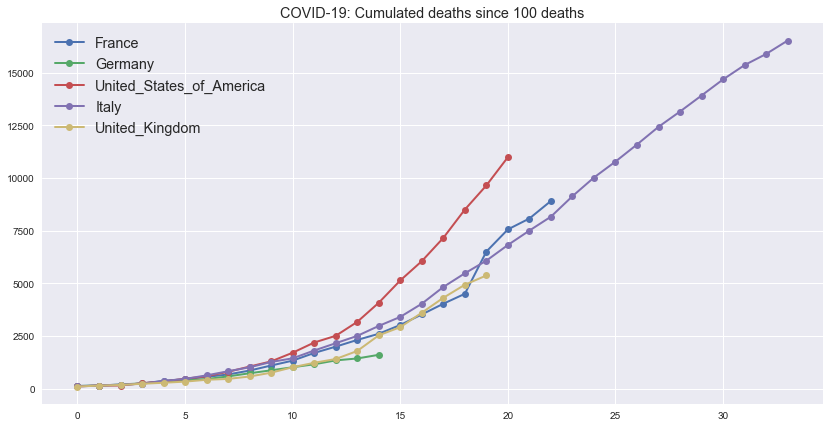

In [10]:
fig, ax = plt.subplots(figsize=(14,7))
for code in ['France','Germany','United_States_of_America','Italy','United_Kingdom']:
    plt.plot(start_100_deaths[start_100_deaths['country'] == code]['cum_deaths'].values, label=code, linewidth=2, marker='o')

plt.legend(fontsize='x-large')
ax.set_title('COVID-19: Cumulated deaths since 100 deaths', fontsize='x-large')
plt.show()

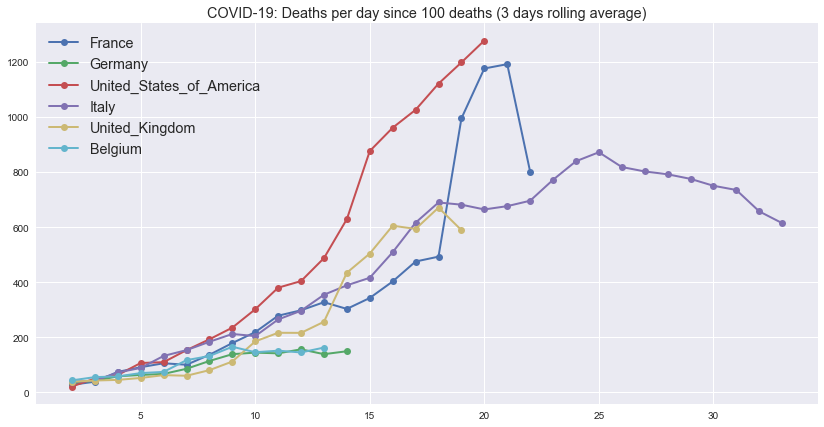

In [11]:
fig, ax = plt.subplots(figsize=(14,7))
for code in ['France','Germany','United_States_of_America','Italy','United_Kingdom', 'Belgium']:
    plt.plot(start_100_deaths[start_100_deaths['country'] == code]['deaths'].rolling(window=3).mean().values, label=code, linewidth=2, marker='o')

plt.legend(fontsize='x-large')
ax.set_title('COVID-19: Deaths per day since 100 deaths (3 days rolling average)', fontsize='x-large')
plt.show()

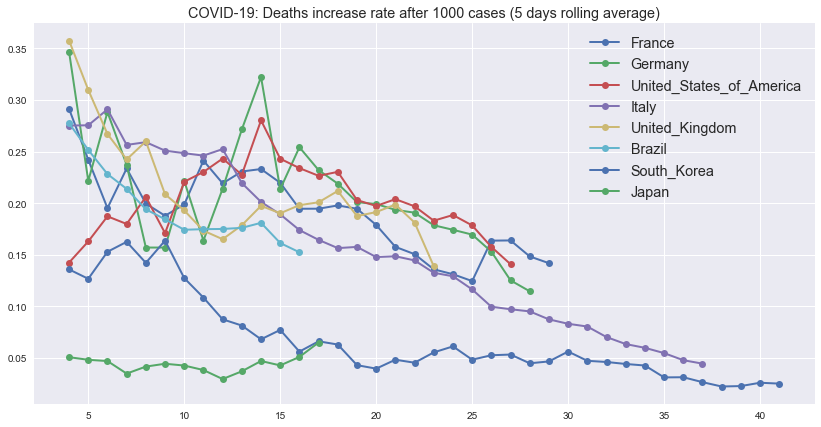

In [12]:
fig, ax = plt.subplots(figsize=(14,7))
for code in ['France','Germany','United_States_of_America','Italy','United_Kingdom', 'Brazil', 'South_Korea', 'Japan']:
    plt.plot(start_1000_cases[start_1000_cases['country'] == code]['rate_deaths'].rolling(window=5).mean().values, label=code, linewidth=2, marker='o')

plt.legend(fontsize='x-large')
ax.set_title('COVID-19: Deaths increase rate after 1000 cases (5 days rolling average)', fontsize='x-large')
plt.show()

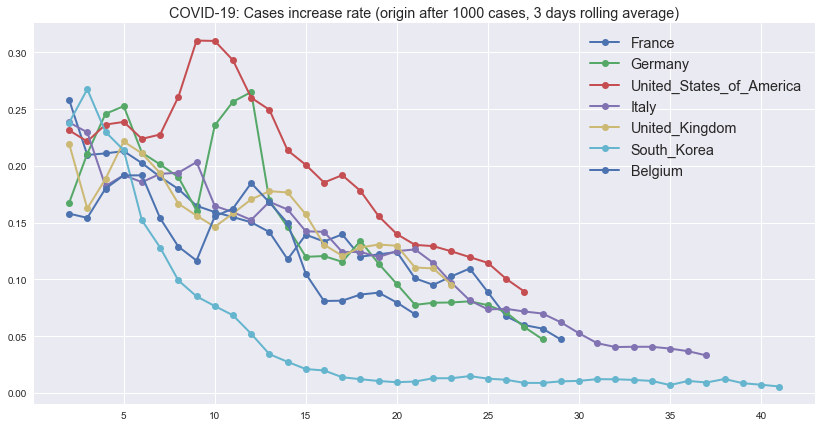

In [13]:
fig, ax = plt.subplots(figsize=(14,7))
for code in ['France','Germany','United_States_of_America','Italy','United_Kingdom', 'South_Korea', 'Belgium']:
    plt.plot(start_1000_cases[start_1000_cases['country'] == code]['rate_cases'].rolling(window=3).mean().values, label=code, linewidth=2, marker='o')

plt.legend(fontsize='x-large')
ax.set_title('COVID-19: Cases increase rate (origin after 1000 cases, 3 days rolling average)', fontsize='x-large')
plt.show()

In [14]:
df[df['country'] == 'Portugal']


,date,country,code,cases,deaths,cum_cases,cum_deaths,rate_cases,rate_deaths
7040,2020-03-03,Portugal,PRT,2,0,2,0,1.000000,NaN
7039,2020-03-04,Portugal,PRT,2,0,4,0,0.500000,NaN
7038,2020-03-05,Portugal,PRT,1,0,5,0,0.200000,NaN
7037,2020-03-06,Portugal,PRT,4,0,9,0,0.444444,NaN
7036,2020-03-07,Portugal,PRT,4,0,13,0,0.307692,NaN
7035,2020-03-08,Portugal,PRT,8,0,21,0,0.380952,NaN
7034,2020-03-09,Portugal,PRT,9,0,30,0,0.300000,NaN
7033,2020-03-10,Portugal,PRT,9,0,39,0,0.230769,NaN
7032,2020-03-11,Portugal,PRT,2,0,41,0,0.048780,NaN
7031,2020-03-12,Portugal,PRT,18,0,59,0,0.305085,NaN


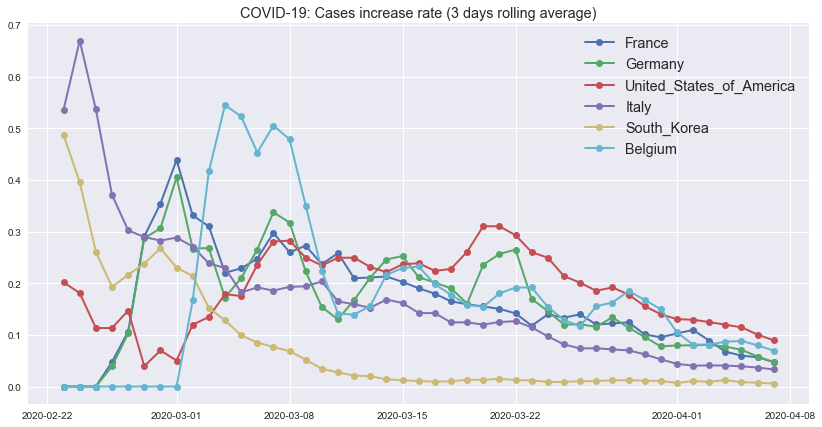

In [15]:
fig, ax = plt.subplots(figsize=(14,7))
for code in ['France','Germany','United_States_of_America','Italy', 'South_Korea', 'Belgium']:
    plot_data = df[(df['country'] == code) & (df['date'] > "2020-02-20")]
    plt.plot(plot_data['date'],plot_data['rate_cases'].rolling(window=3).mean().values, label=code, linewidth=2, marker='o')

plt.legend(fontsize='x-large')
ax.set_title('COVID-19: Cases increase rate (3 days rolling average)', fontsize='x-large')
plt.show()